### Reflection and refraction

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, Ellipse, Circle
import numpy as np

plt.style.use('dark_background')

# color: https://matplotlib.org/stable/gallery/color/named_colors.html

In [2]:
# Constants for styling
ARROW_HEAD_WIDTH = 0.07
ARROW_HEAD_LENGTH = 0.1
LINE_WIDTH = 3

def reflection(ax, title=None, title_loc='center', fontsize=12, incident_angle=45, len=2, arc_d=0.3, arrow2origin=0.7, theta2origin=0.3, origin=[0,0]):
    """
    Draw a reflection diagram on the provided axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to draw the diagram on.
        title (str, optional): The title of the subplot.
        title_loc (str, optional): The location of the title ('center', 'left', 'right').
        fontsize (int, optional): The font size of the title and labels.
        incident_angle (float, optional): The angle of the incident ray in radians.
        len (float, optional): Length of rays.
        arc_d (float, optional): Diameter of circle underying of arc.
        arrow2origin (float, optional): Distance from arrow base to origin.
        theta2origin (float, optional): Distance from annotation (theta) to angle origin.
        origin (list, optional): Point of reflection.
    """
    # Geometry of medium (hardcoded)
    rect = Rectangle((origin[0]-1, origin[1]-0.2), 2, 0.2, linewidth=1, edgecolor='none', facecolor='dodgerblue')
    ax.add_patch(rect)

    incident_angle=np.deg2rad(incident_angle)
    incident_x = [origin[0]-len*np.sin(incident_angle), origin[0]]
    incident_y = [origin[1]+len*np.cos(incident_angle), origin[1]]
    ax.plot(incident_x, incident_y, 'r', linewidth=LINE_WIDTH, zorder=0)

    reflected_x = [origin[0], origin[0]+len*np.sin(incident_angle)]
    reflected_y = [origin[1], origin[1]+len*np.cos(incident_angle)]
    ax.plot(reflected_x, reflected_y, 'r', linewidth=LINE_WIDTH, zorder=0)

    normal_x = [origin[0], origin[0]]
    normal_y = [origin[1]-len, origin[1]+len]
    ax.plot(normal_x, normal_y, 'w--', linewidth=LINE_WIDTH)

    angle_arc_i = Arc(origin, arc_d, arc_d, theta1=90, theta2=90+np.rad2deg(incident_angle), color='w')
    angle_arc_r = Arc(origin, arc_d, arc_d, theta1=90-np.rad2deg(incident_angle), theta2=90, color='w')
    ax.add_patch(angle_arc_i)
    ax.add_patch(angle_arc_r)

    # Theta labels
    ax.text(origin[0]-theta2origin*np.sin(incident_angle/2), origin[1]+theta2origin*np.cos(incident_angle/2), r'$\theta_i$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    ax.text(origin[0]+theta2origin*np.sin(incident_angle/2), origin[1]+theta2origin*np.cos(incident_angle/2), r'$\theta_r$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)

    # Other labels
    ax.text(origin[0]-0.75, origin[1]+0.1, '$n_1$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    ax.text(origin[0]-0.75, origin[1]-0.1, '$n_2$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)

    # Arrows
    ax.arrow(
        origin[0]-arrow2origin*np.sin(incident_angle),
        origin[1]+arrow2origin*np.cos(incident_angle),
        0.001*np.sin(incident_angle),
        -0.001*np.cos(incident_angle),
        head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc='w', ec='none')
    ax.arrow(
        origin[0]+arrow2origin*np.sin(incident_angle),
        origin[1]+arrow2origin*np.cos(incident_angle),
        0.001*np.sin(incident_angle),
        0.001*np.cos(incident_angle),
        head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc='w', ec='none')

    ax.set_xlim(origin[0]-1, origin[0]+1)
    ax.set_ylim(origin[1]-0.2, origin[1]+1)
    ax.set_aspect('equal')

    # ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

def refraction(ax, title=None, title_loc='center', fontsize=12, n_1=1, n_2=1.5, incident_angle_deg=45, len=2, arc_d=0.3, arrow2origin=0.5, theta2origin=0.3, origin=[0,0]):
    """
    Draw a refraction diagram on the provided axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to draw the diagram on.
        title (str, optional): The title of the subplot.
        title_loc (str, optional): The location of the title ('center', 'left', 'right').
        fontsize (int, optional): The font size of the title and labels.
        n_1, n_2 (float, optional): Refractive indices of medium.
        incident_angle_deg (float, optional): The angle of the incident ray in radians.
        len (float, optional): Length of rays.
        arc_d (float, optional): Diameter of circle underying of arc.
        arrow2origin (float, optional): Distance from arrow base to origin.
        theta2origin (float, optional): Distance from annotation (theta) to angle origin.
        origin (list, optional): Point of refraction.
    """
    # Geometry of medium (hardcoded)
    rect = Rectangle((origin[0]-1, origin[1]-0.6), 2, 0.6, linewidth=1, edgecolor='none', facecolor='dodgerblue', zorder=-1)
    ax.add_patch(rect)

    incident_angle=np.deg2rad(incident_angle_deg)
    incident_x = [origin[0]-len*np.sin(incident_angle), origin[0]]
    incident_y = [origin[1]+len*np.cos(incident_angle), origin[1]]
    ax.plot(incident_x, incident_y, 'r', linewidth=LINE_WIDTH, zorder=0)

    refracted_angle = np.arcsin(n_1 * np.sin(incident_angle) / n_2)
    refracted_x = [origin[0], origin[0]+len * np.sin(refracted_angle)]
    refracted_y = [origin[1], origin[1]-len * np.cos(refracted_angle)]
    ax.plot(refracted_x, refracted_y, 'r', linewidth=LINE_WIDTH, zorder=0)

    normal_x = [origin[0], origin[0]]
    normal_y = [origin[1]-len, origin[1]+len]
    ax.plot(normal_x, normal_y, 'w--', linewidth=LINE_WIDTH)

    angle_arc_i = Arc(origin, arc_d, arc_d, theta1=90, theta2=90+np.rad2deg(incident_angle), color='w')
    angle_arc_r = Arc(origin, arc_d, arc_d, theta1=-90, theta2=np.rad2deg(refracted_angle) - 90, color='w')
    ax.add_patch(angle_arc_i)
    ax.add_patch(angle_arc_r)

    # Theta labels
    ax.text(origin[0]-theta2origin*np.sin(incident_angle/2), origin[1]+theta2origin*np.cos(incident_angle/2), r'$\theta_i$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    ax.text(origin[0]+theta2origin*np.sin(refracted_angle/2), origin[1]-theta2origin*np.cos(refracted_angle/2), r'$\theta_t$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)

    # Other labels
    ax.text(origin[0]-0.75, origin[1]+0.1, f'$n_1={n_1}$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    ax.text(origin[0]-0.75, origin[1]-0.1, f'$n_2={n_2}$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)
    ax.text(origin[0]+0.5, origin[1]+0.4, rf'$\theta_1={incident_angle_deg}, \theta_2={np.rad2deg(refracted_angle):.1f}$', horizontalalignment='center', verticalalignment='center', fontsize=fontsize)

    # Arrows
    ax.arrow(
        origin[0]-arrow2origin * np.sin(incident_angle),
        origin[1]+arrow2origin * np.cos(incident_angle),
        0.001 * np.sin(incident_angle),
        -0.001 * np.cos(incident_angle),  head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc='w', ec='none')
    # ax.quiver(
    #     origin[0]-arrow2origin * np.sin(incident_angle),
    #     origin[1]+arrow2origin * np.cos(incident_angle),
    #     0.001 * np.sin(incident_angle),
    #     -0.001 * np.cos(incident_angle))
    ax.arrow(
        origin[0]+arrow2origin * np.sin(refracted_angle),
        origin[1]-arrow2origin * np.cos(refracted_angle),
        0.001 * np.sin(refracted_angle),
        -0.001 * np.cos(refracted_angle),
        head_width=ARROW_HEAD_WIDTH, head_length=ARROW_HEAD_LENGTH, fc='w', ec='none')

    ax.set_xlim(origin[0]-1, origin[0]+1)
    ax.set_ylim(origin[1]-0.6, origin[1]+0.6)
    ax.set_aspect('equal')

    ax.grid(True)
    ax.axis('off')

    if title:
        ax.set_title(title, loc=title_loc, fontsize=fontsize)

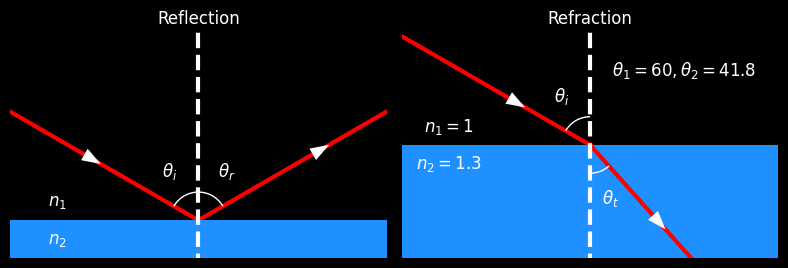

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

reflection(axes[0], title='Reflection', incident_angle=60)
refraction(axes[1], title='Refraction', n_1=1, n_2=1.3, incident_angle_deg=60)

plt.tight_layout()
plt.show()

**Reflection**

$$\theta_i=\theta_r$$

**Refraction**

$$\boxed{n_1\sin(\theta_i)=n_2\sin(\theta_t)}$$

$i$: incident, $r$: reflected, $t$: transmitted, $n$: refractive index

$$c_{k}=\frac{c}{n_{k}}$$

$$\lambda_{k}=\frac{\lambda}{n_{k}}$$